# Homework 3

## Part 1 - Iris flowers

### Sepal and petal dimensions

From the plot in figure 1 there seems to be a somewhat linear relationship between petal length and sepal length for the species versicolor and verginica. The same is true for the relationship between petal and sepal width, shown in figure 2. However,for the species setosa, the sepal and petal length does not seem to depend on the width.

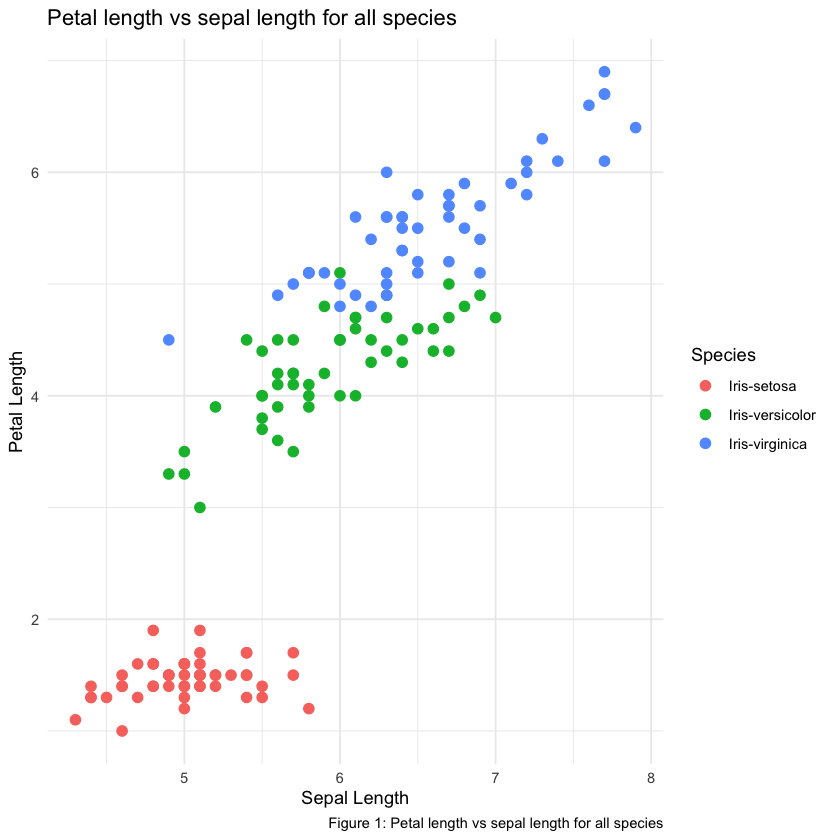

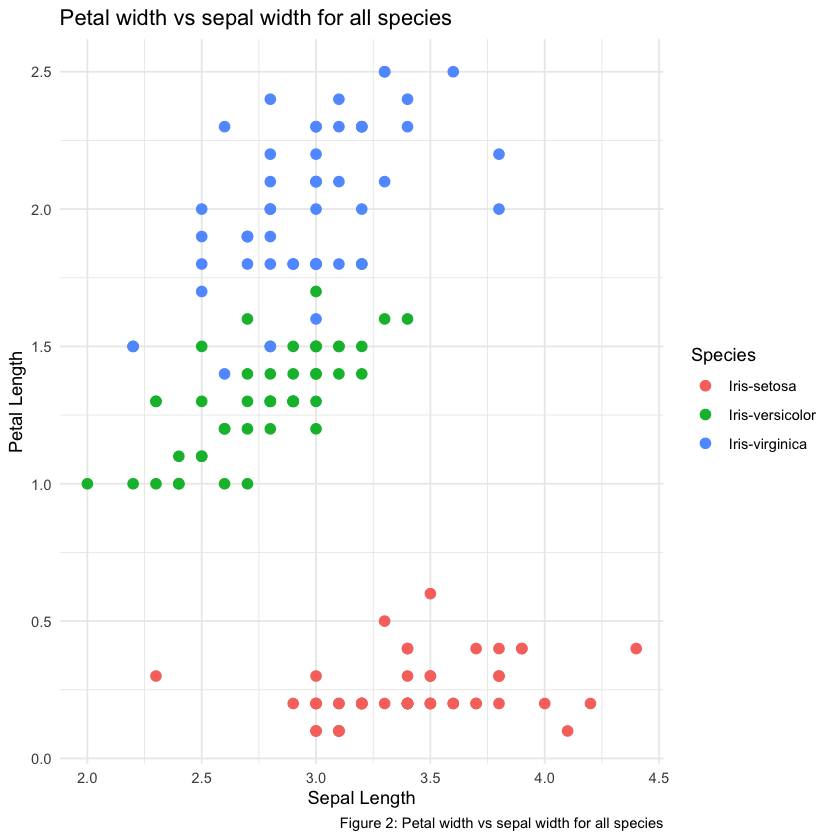

In [804]:
library("ggplot2")
library("patchwork")

iris <- read.csv("IRIS.csv")

ggplot(iris, aes(x = sepal_length, y = petal_length, color = species)) +
  geom_point(size = 2.6) +
  theme_minimal() +
  labs(title = "Petal length vs sepal length for all species", 
       x = "Sepal Length", 
       y = "Petal Length", 
       color = "Species", 
       caption = "Figure 1: Petal length vs sepal length for all species")

ggplot(iris, aes(x = sepal_width, y = petal_width, color = species)) +
  geom_point(size = 2.6) +
  theme_minimal() +
  labs(title = "Petal width vs sepal width for all species", 
       x = "Sepal Length", 
       y = "Petal Length", 
       color = "Species", 
       caption = "Figure 2: Petal width vs sepal width for all species")

### Distribution dimensions

The boxplots in figure 3 to 6 shows that petal dimensions, length and width, provide the most distinct separation between species, with setosa having the smallest and least variable petals, while virginica has the largest. Sepal dimensions show more overlap, particularly between versicolor and virginica, though setosa generally has the largest sepal width and shortest sepal length. Overall, petal measurements are likely more effective for distinguishing species than sepal measurements.

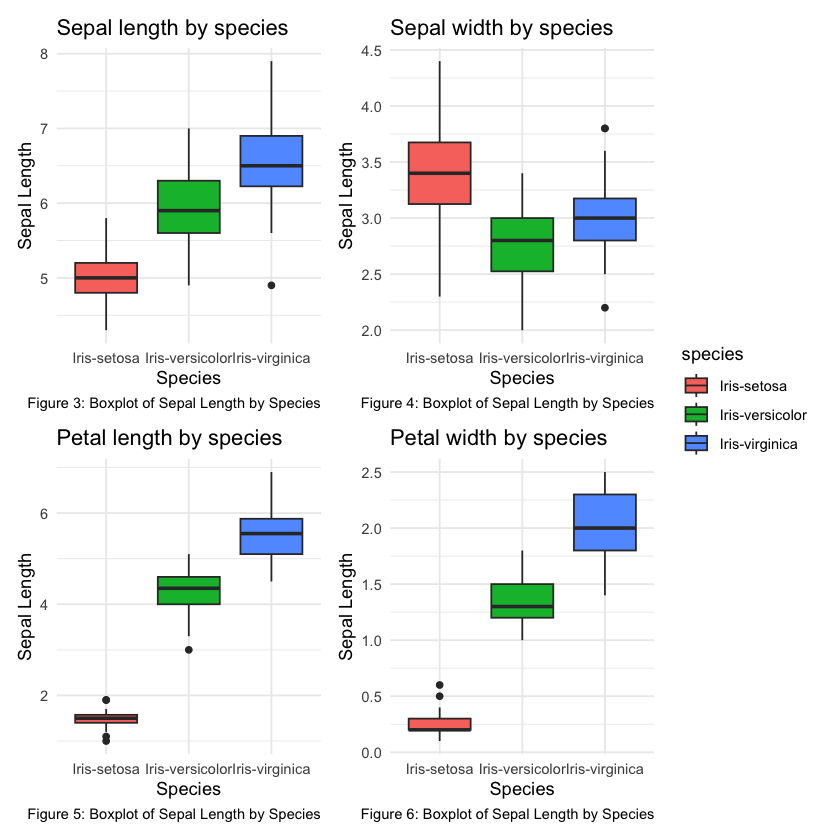

In [803]:
p1 <- ggplot(iris, aes(x = species, y = sepal_length, fill = species)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Sepal length by species", 
       x = "Species", 
       y = "Sepal Length",
       caption = "Figure 3: Boxplot of Sepal Length by Species")
p2 <- ggplot(iris, aes(x = species, y = sepal_width, fill = species)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Sepal width by species", 
       x = "Species", 
       y = "Sepal Length",
       caption = "Figure 4: Boxplot of Sepal Length by Species")
p3 <- ggplot(iris, aes(x = species, y = petal_length, fill = species)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Petal length by species", 
       x = "Species", 
       y = "Sepal Length",
       caption = "Figure 5: Boxplot of Sepal Length by Species")
p4 <- ggplot(iris, aes(x = species, y = petal_width, fill = species)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Petal width by species", 
       x = "Species", 
       y = "Sepal Length",
       caption = "Figure 6: Boxplot of Sepal Length by Species")
(p1 | p2) / (p3 | p4) + plot_layout(guides = "collect") 

### Pairs-plot

The results from the pairs-plot, in figure 7, show that the diffrent relationships between dimentions for the species versicolor and virginica is overall linear, except for the comparison of sepal width and length. As concluded from figure 1 and 2, the dimensions of the setosa petal does not depend on any other vaiable that the sepal width. 

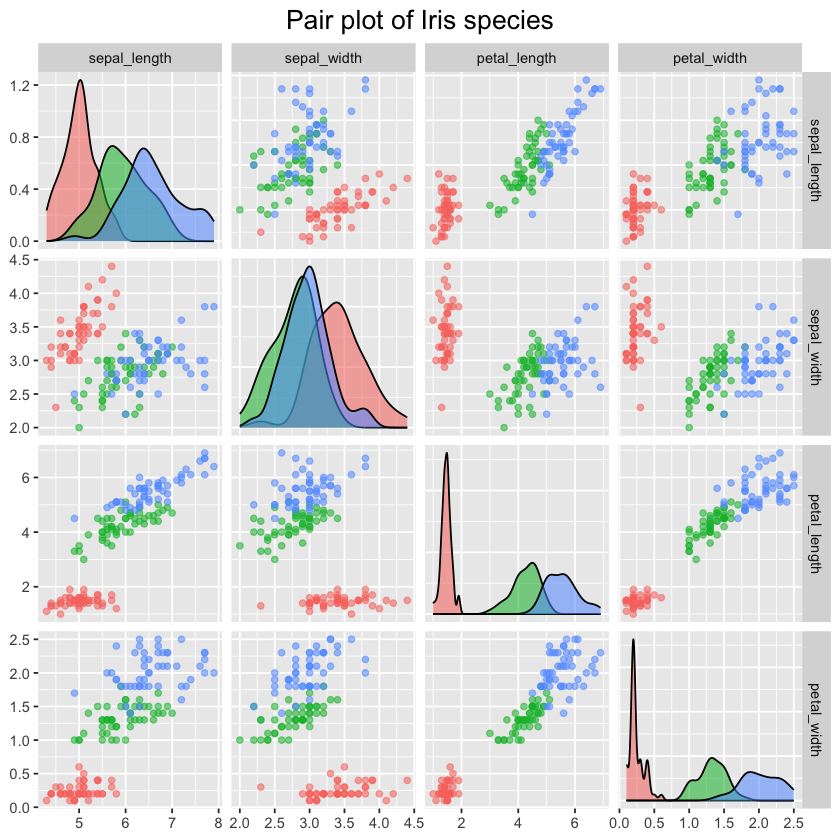

In [122]:
library("GGally")
ggpairs(iris[, 1:4], aes(color = iris$species, alpha = 0.6),
        diag = list(continuous = "densityDiag"),
        upper = list(continuous = "points"),
        lower = list(continuous = "points"))+ 
  ggtitle("Pair plot of Iris species") + 
  theme(plot.title = element_text(hjust = 0.5, size = 16))

## Part 2 - Birdwatching

### Most prevelant species

The most prevelent bird species is shown in table 1.

In [347]:
library("knitr")
library("kableExtra")

species_data <- read.csv("artportalen.csv")
species_data$Startdatum <- as.Date(species_data$Startdatum)                       
species_data$month <- factor(format(species_data$Startdatum, "%b"),                  # Column with month
                             levels = c("Jan", "Feb", "Mar", "Apr", "Maj", "Jun"))
species_data <- species_data %>% mutate(Antal = ifelse(Antal == "noterad", 1,        # Rename "noted" as 1
                            ifelse(Antal == "Ej återfunnen", 0, Antal)))         # Rename "not found" as 0
species_data[, 7] <- as.numeric(as.character(species_data[, 7]))

tot_birds <- aggregate(species_data[, 7], by = list(species_data[, 4]), FUN = sum) # Sum total birds per species
tot_birds_sorted <- tot_birds[order(tot_birds$x, decreasing = TRUE), ]           # Sort for most prevelant 

data.frame(tot_birds_sorted[1:5, ]) %>%
  kable("html", caption = "Table 1: Top five most sighted bird species", escape = FALSE, 
        col.names = c("Species", "Total sighted")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 1: Top five most sighted bird species</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Species </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Total sighted </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Grönsiska </td>
   <td style="text-align:right;"> 20237 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Sothöna </td>
   <td style="text-align:right;"> 8393 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Gräsand </td>
   <td style="text-align:right;"> 7296 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Storskrake </td>
   <td style="text-align:right;"> 6800 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Vitkindad gås </td>
   <td style="text-align:right;"> 6391 </td>
  </tr>
</tbody>
</table>

### Distribution top 3 most prevelant species

The distribution of the top three most prevelant bird species is shown in a barplot in figure 8. Note that plot is logarithmized since the amount of observed grönsiskor in january is so large.

`summarise()` has grouped output by 'Artnamn'. You can override using the
`.groups` argument.


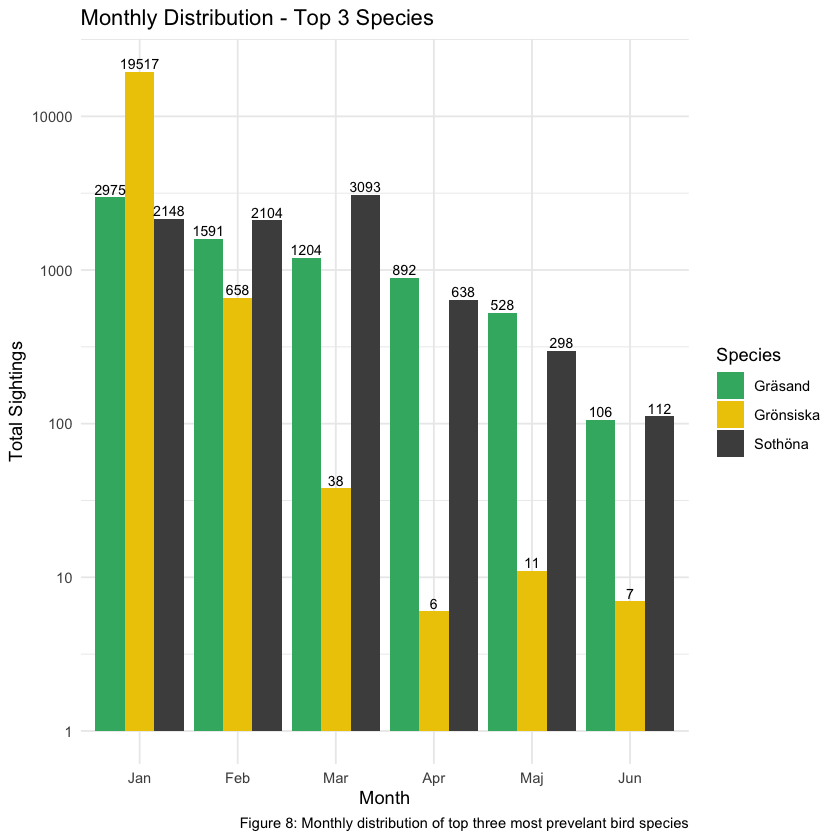

In [376]:
library("ggplot2")

top_three_data <- species_data %>% filter(Artnamn %in% c("Grönsiska", "Sothöna", "Gräsand"))
monthly_distribution <- top_three_data %>% group_by(Artnamn, month) %>% summarize(total = sum(Antal, na.rm = TRUE))

ggplot(monthly_distribution, aes(x = month, y = total, fill = Artnamn)) +  
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_log10() +
  geom_text(aes(label = total), 
            position = position_dodge(width = 0.9), 
            vjust = -0.3, size = 3) + 
  labs(title = "Monthly Distribution - Top 3 Species",
       x = "Month",
       y = "Total Sightings",
       fill = "Species",
       caption = "Figure 8: Monthly distribution of top three most prevelant bird species") +
  theme_minimal() +
  scale_fill_manual(values = c("Grönsiska" = "gold2", "Sothöna" = "gray30", "Gräsand" = "mediumseagreen")) 

### Rarest species

The rarest birds are the ones where only one bird of the species has been observed. All of these species is shown in table 2. 

In [392]:
rare_species <- tot_birds[tot_birds$x == 1, ]
rare_species_df <- as.data.frame(matrix(rare_species[,1], ncol = 4, byrow = TRUE))

rare_species_df %>%
  kable("html", caption = "Table 2: Rarest Species - only one sighting", escape = FALSE, 
        col.names = c("Species", "", "", "")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 2: Rarest Species - only one sighting</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Species </th>
   <th style="text-align:left;background-color: lightsteelblue !important;">  </th>
   <th style="text-align:left;background-color: lightsteelblue !important;">  </th>
   <th style="text-align:left;background-color: lightsteelblue !important;">  </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Bivråk </td>
   <td style="text-align:left;"> Bändelkorsnäbb </td>
   <td style="text-align:left;"> Ejder </td>
   <td style="text-align:left;"> Fjällvråk </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Forsärla </td>
   <td style="text-align:left;"> Gravand </td>
   <td style="text-align:left;"> Lappsparv </td>
   <td style="text-align:left;"> Ob. korsnäbb </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ormvråk, underarten buteo </td>
   <td style="text-align:left;"> Rosenfink </td>
   <td style="text-align:left;"> Röd glada </td>
   <td style="text-align:left;"> Rödbena </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Spillkråka </td>
   <td style="text-align:left;"> Storlom </td>
   <td style="text-align:left;"> Strömstare </td>
   <td style="text-align:left;"> Tornfalk </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Trädlärka </td>
   <td style="text-align:left;"> Varfågel </td>
   <td style="text-align:left;"> Vinterhämpling </td>
   <td style="text-align:left;"> Ägretthäger </td>
  </tr>
</tbody>
</table>

### Top 3 locations - Bird sightings

The first thing I wanted to explore were where the largest amount of birds have observed. The result is shown in table 1. The top three locations are very close to each other, all of them located on the west part of djurgården. The other two locations are also very close by which indicates that this part of stockholm is a good spot for observing birds. The results can also be explained by the fact that the observer could be in these places within a short period of time and therefor observe more birds in one "outing". 

In [398]:
locations <- aggregate(species_data[, 7], by = list(species_data[, 11]), FUN = sum)
locations_sorted <- tot_birds[order(tot_birds$x, decreasing = TRUE), ]

locations_sorted[1:5, ] %>%
  kable("html", caption = "Table 1: Top five most sighted bird species", escape = FALSE, 
        col.names = c("Location", "Recorded sightings")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 3: Top five locations with respect to birds sighted</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Location </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Recorded sightings </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Isbladskärret </td>
   <td style="text-align:right;"> 12863 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Biskopsudden </td>
   <td style="text-align:right;"> 12217 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Isbladsviken </td>
   <td style="text-align:right;"> 9452 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ladugårdsgärdet </td>
   <td style="text-align:right;"> 7419 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Kaknäs skär </td>
   <td style="text-align:right;"> 6320 </td>
  </tr>
</tbody>
</table>

### Activites amongst top 5 most sigthet birds

The second thing I was interested in exploring was the behaviors of the observed birds depending on the month. To get a clearer view of the different behaviours I have chosen to exlude the catagory "rastande" since it overshadows evry other catagory and is not in itself very intresting. The barplot in figure 9 illustrate the frequency of the top five most frequent activities each month. 

The first noteble result is the pattern of the activity singing. As you might expect the amount of birds singing increase alot throughout spring with a huge peak in may. The second noteworthy result is the activitys related to reproduction. During the winter months, in january and febuary, the activity "mating call" appears. In march however, the mating calls have been replaced with longer movements. During april and may, a more commen thing to observe is couples, one male and one female, that presumably belong together. Finally in june observations where the nestlings have left the nest. 

Compared to the other months, to total amount of activity in june is a lot smaller. The reason of this is unknown but it could be explaind by the general behavior of birds or the scheduale of the observers. 

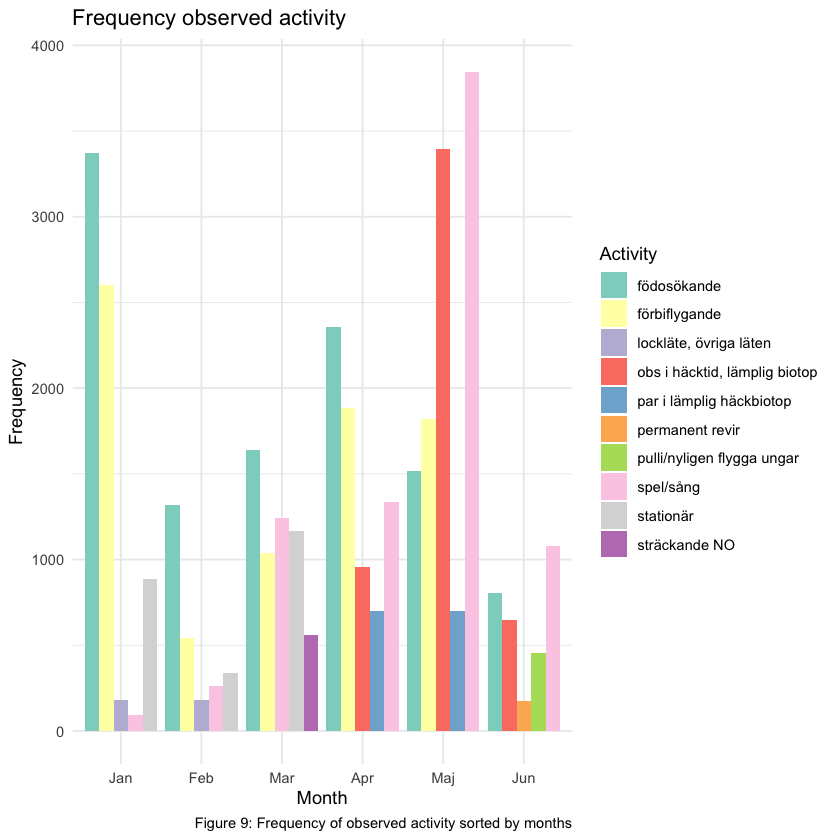

In [806]:
activity <- aggregate(species_data[, 7], by = list(Activity = species_data[, 10], Month = species_data$month), FUN = sum)
colnames(activity) <- c("Activity", "Month", "Frequency")
activity <- activity[activity$Activity!="rastande", ] 

top_activities <- activity %>%
  group_by(Month) %>%
  slice_max(Frequency, n = 5) %>% 
  ungroup()

ggplot(top_activities, aes(x = Month, y = Frequency, fill = Activity)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Frequency observed activity",
       x = "Month",
       y = "Frequency",
       fill = "Activity",
       caption = "Figure 9: Frequency of observed activity sorted by months")

### Species most likely seen in large groups

The last part of the dataset I wanted do explore was the size of the observed grupus of birds. To understand which species are most likely to be seen in large groups, the results in table 4 can be examined. The table show the percentage of sightings with more than 100 individuals. The top two species have only been sighted in a large groups and further examination of the data shows that the birds have only been observed once. It is also important to note that the top three most prevelant species also make the top six in table 4. This might explain why these birds are the most prevelant since they have been observed in larger groups relativly frequently, hence the total amount of observed birds is high.

In [810]:
groups <- table(species_data$Artnamn, cut(species_data$Antal, 
                               breaks = c(0, 5, 10, 20, 100, Inf), 
                               labels = c("1-5", "5-10", "10-20", "20-100", "100+"),
                               right = FALSE))
per_large_group <- sort(round((groups[,5]/rowSums(groups))*100, 2), decreasing = TRUE)
per_large_group[1:10] %>%
  kable("html", caption = "Table 4: Sightings with 100+ individuals", escape = FALSE, 
        col.names = c("Species", "Large group sightings")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 4: Sightings with 100+ individuals</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Species </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Large group sightings </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Mellanskarv </td>
   <td style="text-align:right;"> 100.00% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Måsfåglar </td>
   <td style="text-align:right;"> 100.00% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Grönsiska </td>
   <td style="text-align:right;"> 8.71% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Sothöna </td>
   <td style="text-align:right;"> 5.85% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Storskarv </td>
   <td style="text-align:right;"> 4.10% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Gräsand </td>
   <td style="text-align:right;"> 3.77% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Storskrake </td>
   <td style="text-align:right;"> 3.07% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Sidensvans </td>
   <td style="text-align:right;"> 1.85% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Tornseglare </td>
   <td style="text-align:right;"> 1.37% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Rödvingetrast </td>
   <td style="text-align:right;"> 1.30% </td>
  </tr>
</tbody>
</table>


## Part 3 - Predicting strokes

The data set contains information about male and female individuals from all ages, including children. The collected data include information about the individuals marital status, work and residence type, and smoking status. It also include medical information about the individuals glucose level, bmi, heart disease status and if they have had a stroke. 

After reviewing the dataset, I wanted to primarily focus on exploring the correlation between the given medical and lifestyle information and stroke. Specifically I wanted to look at BMI, glucose level, work type and residence type.

### Correlation bmi, glucose level and stroke 

To understand more about the correlation between bmi, glucose level and strokes, two separate plots have been made with the individuals age on the x-axis. The first thing that is evident by looking at the two plots in figure 10 and 11 is that almost no one under the age of 40 has had a stroke. The proportion of patients with a stroke increase as they get older, as you might expect and the majority of patients who have experienced a stroke is over the age of 60. 

In regards to the correlation between bmi and stroke, one interesting observations can be made. Between the ages 40 and 60 it seems as if mostly individuals with a higher bmi, above 27, have hade a stroke. In comparison with the older age groups where strokes are apparent in patiens with all levels of bmi. One take away from this could be that a higher bmi might be a bigger risk factor in younger age groups compared to the older individuals who are at risk either way. 

Warning message:
“Removed 201 rows containing missing values or values outside the scale range
(`geom_point()`).”


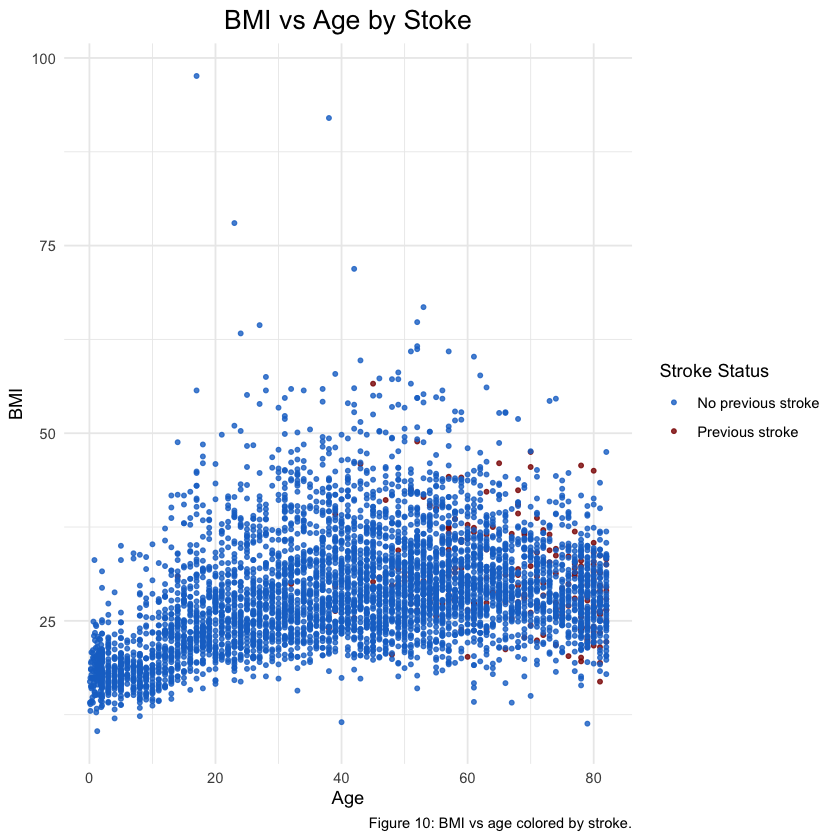

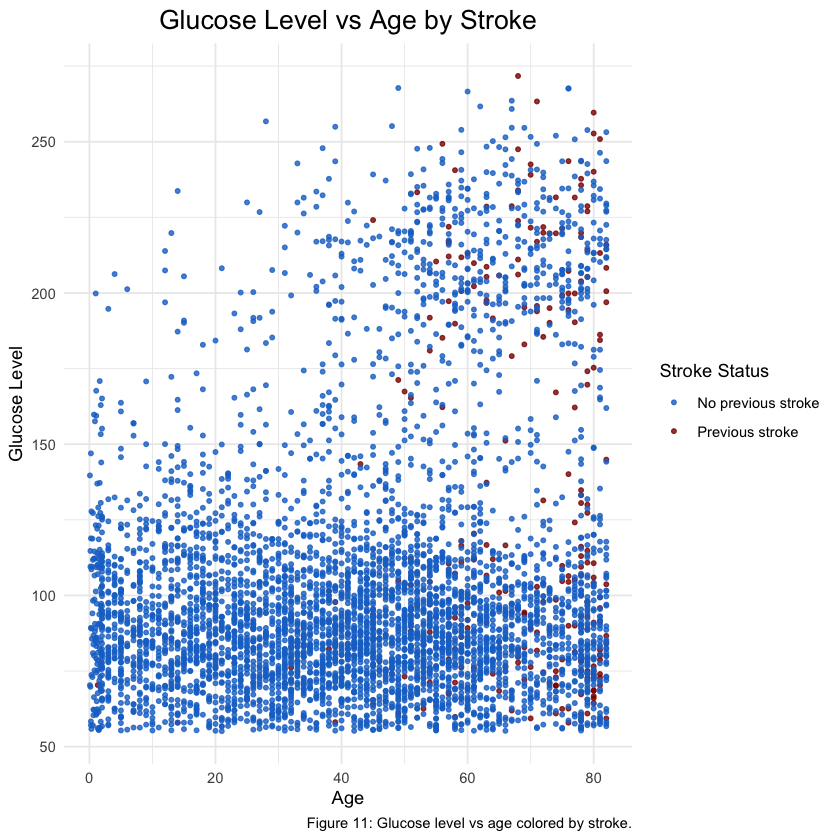

In [873]:
stroke <- read.csv("stroke-data.csv")
stroke$bmi <- as.numeric(ifelse(stroke$bmi == "N/A", NA, stroke$bmi))

ggplot(stroke, aes(x = age, y = bmi, color = factor(stroke))) +
  geom_point(alpha = 0.8, size = 1) +
  scale_color_manual(values = c("dodgerblue3", "darkred"),labels = c("No previous stroke", "Previous stroke"))+
  labs(title = "BMI vs Age by Stoke",
       x = "Age",
       y = "BMI",
       color = "Stroke Status",
       caption = "Figure 10: BMI vs age colored by stroke.") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

ggplot(stroke, aes(x = age, y = avg_glucose_level, color = factor(stroke))) +
  geom_point(alpha = 0.8, size = 1) +
  scale_color_manual(values = c("dodgerblue3", "darkred"),labels = c("No previous stroke", "Previous stroke"))+
  labs(title = "Glucose Level vs Age by Stroke",
       x = "Age",
       y = "Glucose Level",
       color = "Stroke Status",
       caption = "Figure 11: Glucose level vs age colored by stroke.") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 16))

The first noticeable thing about the results shown in the second plot in figure 11 is that high glucose levels are more prominent among older individuals. However, the correlation between glucose level and stroke is somewhat more difficult to discern. It seems that the ratio of individuals with stroke is higher among patients with higher glucose levels. To investigate this further, the ratio of people who have suffered a stroke, depending on their glucose level, is shown in table 5. Since almost no one under the age of 40 has experienced a stroke and a majority of them have lower glucose levels, I have chosen to specifically look at the ratio of strokes in individuals older than 40. The previous suspicions from observations of figure 11 are confirmed by the results in table 5. For individuals with glucose levels in the higher range (above 150), the stroke ratio is twice as high, which suggests that higher average glucose is a risk factor for stroke.

In [ ]:
stroke_40 <- stroke[stroke$age >= 40, ]
glucose_group <- table(stroke_40$stroke, cut(stroke_40$avg_glucose_level, 
                                   breaks = c(0, 100, 150, 200, Inf), 
                                   labels = c("0-100", "100-150", "150-200", "200+"),
                                   right = FALSE))
ratio_glucose_group <- round((glucose_group[2,]/colSums(glucose_group))*100, 1)
ratio_glucose_group %>%
  kable("html", caption = "Table 5: Percentage of individuals with strokes by glucose level.", escape = FALSE, 
        col.names = c("Glucose level", "Individuals with stroke")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 5: Percentage of individuals over the age of 40 with strokes by glucose level.</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Glucose level </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Individuals with stroke </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> 0-100 </td>
   <td style="text-align:right;"> 6.3% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 100-150 </td>
   <td style="text-align:right;"> 7.0% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 150-200 </td>
   <td style="text-align:right;"> 15.6% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> 200+ </td>
   <td style="text-align:right;"> 14.2% </td>
  </tr>
</tbody>
</table>

### Correlation work type, residence type and stroke

To explore the lifestyle aspect of the dataset, I have chosen to create two separate bar plots, shown in figures 12 and 13, that illustrate the ratio of individuals who have experienced a stroke based on their type of occupation and residence. Since the occupation type, in particular, may depend on gender, which could affect the results, males and females are separated in the plots. I have also chosen to exclude children from the dataset, as they are either marked as unemployed or labeled as "children."

Regarding the lifestyle parameter "work type", the results show some interesting differences between gender and work type, see figre 12. The highest percentage of strokes for both males and females occurs among those who are self-employed. For females, the stroke ratio is twice that of government-employed individuals, and the same is true for males who are privately employed. It seems that the different kinds of non-self-employment affect males and females differently in terms of stroke ratios. However, the largest stroke ratio can be found among self-employed individuals for both genders.

The results shown in figure 13 first highlight that the stroke ratio is slightly lower in females overall. It also shows a slight increase in stroke ratio among individuals living in urban areas; however, the difference is very small, less than one percentage point. This could be explained by the different lifestyles associated with urban living, such as varying diets, levels of exercise, air quality, and overall stress levels.

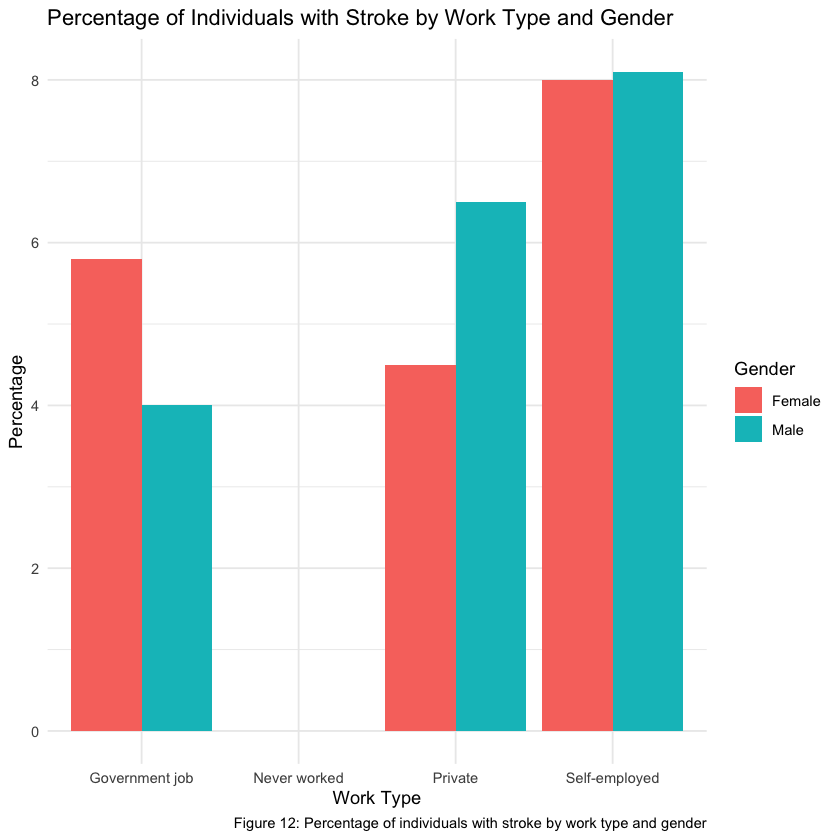

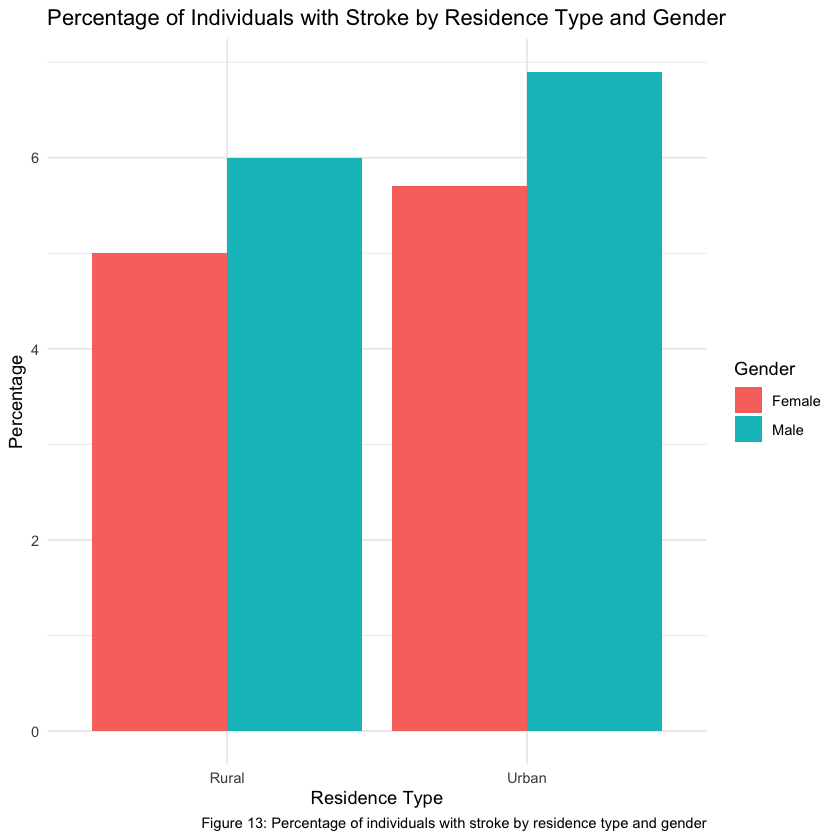

In [957]:
ratio <- function(table) {
  ratio <- round((table[, 2] / rowSums(table)) * 100, 1)  # Stroke cases (column 2) over row sums
  return(ratio)}

stroke <- stroke %>%
  filter(age >= 18) %>% 
  mutate(Gender = ifelse(gender == "Female", "Female", "Male"))

stroke_work <- table(stroke$work_type, stroke$stroke, stroke$Gender)
stroke_residence <- table(stroke$Residence_type, stroke$stroke, stroke$Gender)

work_data <- data.frame(
  Gender = rep(c("Male", "Female"), each = 4), 
  Work_Type = rep(c("Government job", "Never worked", "Private", "Self-employed"), times = 2),
  Percentage = c(ratio(stroke_work[, , "Male"]),ratio(stroke_work[, , "Female"])))

ggplot(work_data, aes(x = Work_Type, y = Percentage, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Percentage of Individuals with Stroke by Work Type and Gender",
       x = "Work Type", 
       y = "Percentage",  
       fill = "Gender",
       caption = "Figure 12: Percentage of individuals with stroke by work type and gender") +  
  theme_minimal()

residence_data <- data.frame(
  Gender = rep(c("Male", "Female"), each = 2), 
  Residence_Type = rep(c("Rural", "Urban"), times = 2),  
  Percentage = c(ratio(stroke_residence[, , "Male"]),ratio(stroke_residence[, , "Female"])))

ggplot(residence_data, aes(x = Residence_Type, y = Percentage, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Percentage of Individuals with Stroke by Residence Type and Gender",
       x = "Residence Type", 
       y = "Percentage",  
       fill = "Gender",
       caption = "Figure 13: Percentage of individuals with stroke by residence type and gender") +  
  theme_minimal()

## Part 4 - Cleaning data

In the first step, we loop through all elements in the dataset and change them into numeric values. Every element containing the letter k, M or B is multilpied with the corresponding value $10^3$, $10^6$ or $10^9$. 

In [852]:
cellphones <- read.csv("cell_phones_total.csv")

numeric <- function(df) {
  for (j in 2:ncol(df)) {          # Loop over every element by column and row
    for (i in 1:nrow(df)) {
      value <- as.character(df[i, j])    # Change k, M and B into numeric values
      if (grepl("k$", value)) {df[i, j] <- as.numeric(gsub("[^0-9.-]", "", value)) * 1e3}  
        else if (grepl("M$", value)) {df[i, j] <- as.numeric(gsub("[^0-9.-]", "", value)) * 1e6} 
        else if (grepl("B$", value)) {df[i, j] <- as.numeric(gsub("[^0-9.-]", "", value)) * 1e9} 
        else {df[i, j] <- as.numeric(gsub("[^0-9.-]", "", value))}}}
  return(df)}

cellphones_num <- numeric(cellphones)

The second step is to replace the NA-values. These appear either in smaller gaps or continue throughout the dataset untill the last recorded year. I have chosen to use linear regression on existing values and replaced the NA-values with the corresponding predicted ones and all negativa values are set to zero.

In [796]:
replace_na <- function(dataset) {
  for (i in 1:nrow(dataset)) {                       # Loop over every row 
    row <- as.numeric(dataset[i, ])              
    missing <- which(is.na(row))                     # Check for rows with missing values
    if (length(missing) > 0) {                       # Continue if there are missing values
        non_zero <- which(row != 0 & !is.na(row))    # Find first nonzero value
        x <- non_zero                                # Define x and y values
        y <- row[non_zero]
        model <- lm(y ~ x)                           # Fit linear model
        predicted_values <- predict(model, newdata = data.frame(x = missing))  # Predict the missing values 
         predicted_values[predicted_values < 0] <- 0            # Replace negative values with zero
        dataset[i, missing] <- round(predicted_values, 0)}}     # Fill in missing values
  return(dataset)}
cellphones_df <- cbind(cellphones_num[,1], replace_na(cellphones_num_zero[, -1]))

Warning message in predict.lm(model, newdata = data.frame(x = missing)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


After making the changes above the five countries with highest amont of cellphones (sorted by the year 2015) can be seen in table 6.

In [800]:
cellphones_sorted <- cellphones_df[order(as.numeric(cellphones_df[['X2015']]), decreasing = TRUE), ]
cellphones_sorted[1:5,c(1, 53:57)] %>%
  kable("html", caption = "Table ?: Top five countries with highest amont of cellphones w.r.t 2015", escape = FALSE, 
        col.names = c("Country", "2015", "2016", "2017", "2018", "2019")) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
<caption>Table 6: Top five countries with highest amont of cellphones w.r.t 2015</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Country </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> 2015 </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> 2016 </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> 2017 </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> 2018 </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> 2019 </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> CHN </td>
   <td style="text-align:left;"> 1.29e+09 </td>
   <td style="text-align:left;"> 1.36e+09 </td>
   <td style="text-align:left;"> 1.47e+09 </td>
   <td style="text-align:left;"> 1.65e+09 </td>
   <td style="text-align:left;"> 1.73e+09 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> IND </td>
   <td style="text-align:left;"> 1e+09 </td>
   <td style="text-align:left;"> 1.13e+09 </td>
   <td style="text-align:left;"> 1.17e+09 </td>
   <td style="text-align:left;"> 1.18e+09 </td>
   <td style="text-align:left;"> 1.15e+09 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> USA </td>
   <td style="text-align:left;"> 3.82e+08 </td>
   <td style="text-align:left;"> 3.96e+08 </td>
   <td style="text-align:left;"> 4e+08 </td>
   <td style="text-align:left;"> 4.22e+08 </td>
   <td style="text-align:left;"> 402222537 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> IDN </td>
   <td style="text-align:left;"> 3.39e+08 </td>
   <td style="text-align:left;"> 3.86e+08 </td>
   <td style="text-align:left;"> 4.35e+08 </td>
   <td style="text-align:left;"> 3.19e+08 </td>
   <td style="text-align:left;"> 3.45e+08 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> BRA </td>
   <td style="text-align:left;"> 2.58e+08 </td>
   <td style="text-align:left;"> 2.44e+08 </td>
   <td style="text-align:left;"> 2.18e+08 </td>
   <td style="text-align:left;"> 2.07e+08 </td>
   <td style="text-align:left;"> 275134650 </td>
  </tr>
</tbody>
</table>